In [1]:
# mv this notebook in src folder
# or
# set sys path to src folder
import os, sys
path_to_scr_folder=os.path.join(os.path.dirname(os.path.abspath('')), 'src')
sys.path.append(path_to_scr_folder)

In [2]:
import plot
from read_chroma import read_only_chroma, read_chromato_and_chromato_cube

In [ ]:
path='/media/camille/DATA1/cdf centroid/'
file='A-F-028-817822-droite-ReCIVA.cdf'


In [5]:
chromato, time_rn= read_only_chroma(path+file, mod_time = 1.7)
# chromato, time_rn, chromato_cube, sigma, (range_min, range_max)= read_chromato_and_chromato_cube(path+file, mod_time = 1.7) #CRASH

# Plot chromatogram

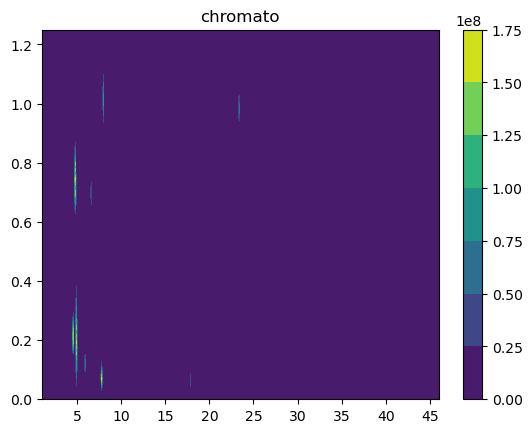

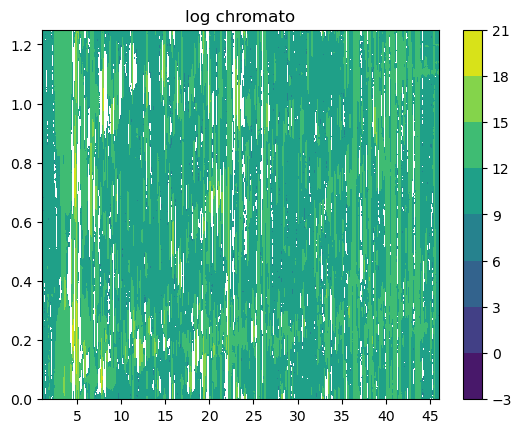

In [25]:
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False)
plot.visualizer((chromato, time_rn), title="log chromato")

Zoom around matrix or chromatogram coordinate

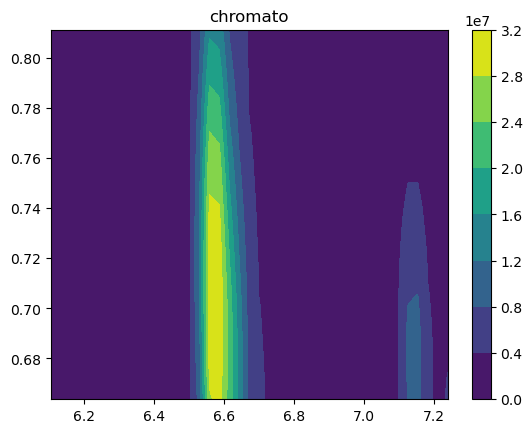

In [8]:
# zoom around matrix coordinate
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, center_pt=[200,200], center_pt_window_1=20, center_pt_window_2=20)

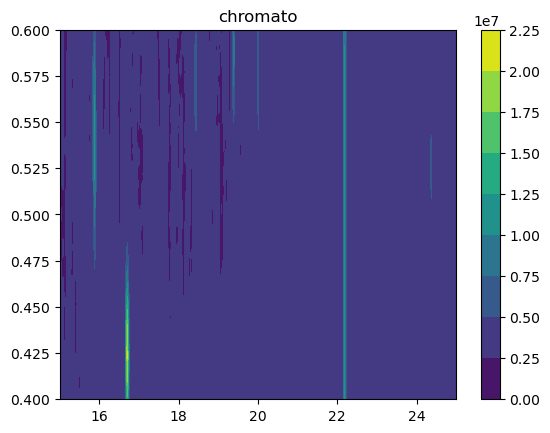

In [9]:
# zoom around chromatogram coordinate
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, rt1 = 20, rt2 =0.5, rt1_window = 5, rt2_window = 0.1)

Plot 3D chromatogram (intensities as third coordinates)

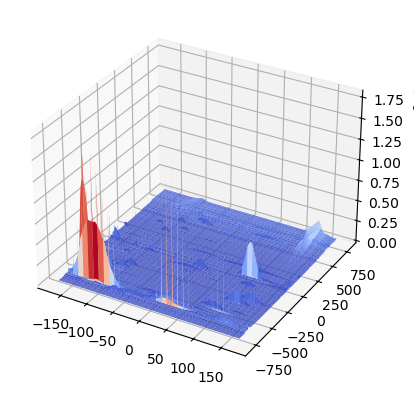

In [10]:
# plot with strides (faster)
plot.plot_3d_chromato(chromato)

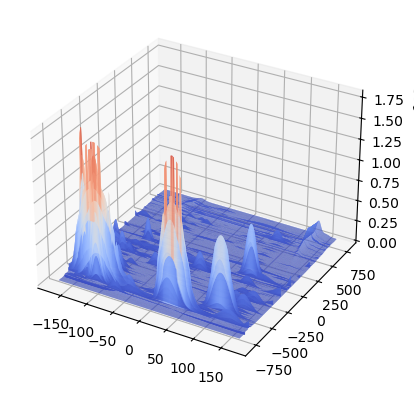

In [11]:
# plot without strides (slower but more precise)
plot.plot_3d_chromato(chromato, rstride=1, cstride=1)

# Plot peaks

In [6]:
#package modules
from read_chroma import read_chromato_and_chromato_cube
from peak_detection import peak_detection
from identification import compute_matches_identification, cohort_identification_alignment_input_format_txt, cohort_identification_to_csv
from matching import matching_nist_lib_from_chromato_cube
from utils import get_name_dict
import projection
###
import numpy as np

In [7]:
chromato, time_rn, chromato_cube, sigma, mass_range=read_chromato_and_chromato_cube(path+file, mod_time=1.25, pre_process=True)

chromato read 15.49435830116272 s
--- 111.19333791732788 seconds --- to compute full spectra centroid
full spectra computed 112.67685890197754 s
baseline corrected


In [8]:
seuil=5
MIN_SEUIL = seuil * sigma * 100 / np.max(chromato)
# detect peaks
coordinates = peak_detection((chromato, time_rn, None), None, chromato_cube, MIN_SEUIL, None)
len(coordinates)

751

In [9]:
# project the coordinates
coordinates_in_chromato=projection.matrix_to_chromato(coordinates, time_rn, 1.25, chromato.shape)

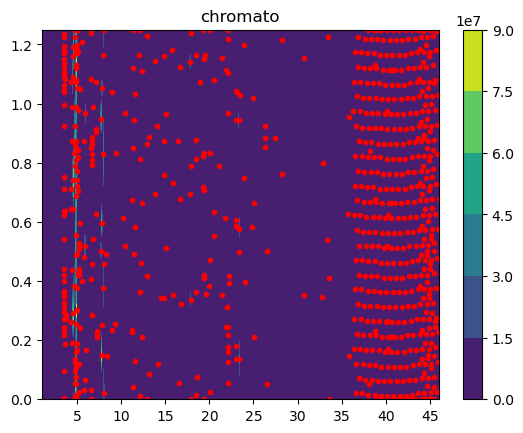

/home/camille/Documents/code/agouet/Python-2DGC-Alignment/src/plot.py:366: RuntimeWarning: divide by zero encountered in log
  chromato = np.log(chromato)


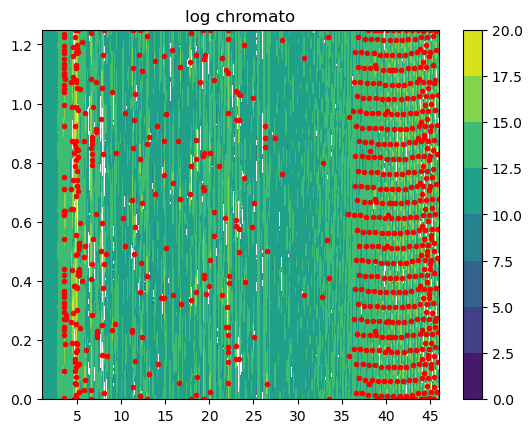

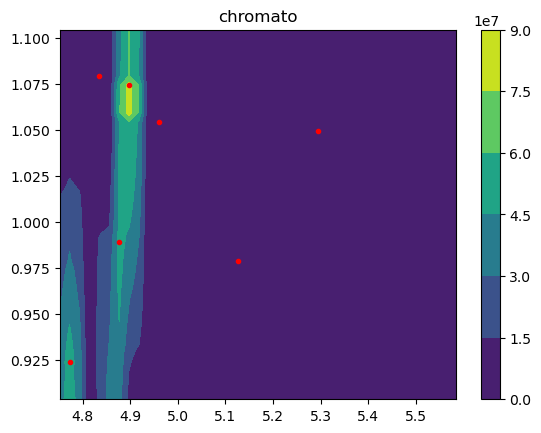

In [10]:
# plot peaks
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, points=coordinates_in_chromato)
plot.visualizer((chromato, time_rn), title="log chromato", points=coordinates_in_chromato)
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, points=coordinates_in_chromato, center_pt=[200,200], center_pt_window_1=20, center_pt_window_2=20)

docker rm pyms-nist-server

In [16]:
hit_prob_min=0
match_factor_min=0
# 2D peaks identification with NIST datanase
matches = matching_nist_lib_from_chromato_cube((chromato, time_rn, mass_range), chromato_cube, coordinates, mod_time = 1.25, hit_prob_min=hit_prob_min, match_factor_min=match_factor_min)

Launching Docker...
nb_peaks:  751
nb match:
751


In [17]:
# group coordinates by casno
casnos_dictall = get_name_dict(matches)

Acetone
Acetone
Acetone
Acetone
Acetone
Acetone
Acetone
Acetone
Acetone
Acetone
Acetone
Acetone
----
Disiloxane, hexamethyl-
Disiloxane, hexamethyl-
Disiloxane, hexamethyl-
Disiloxane, hexamethyl-
Disiloxane, hexamethyl-
Disiloxane, hexamethyl-
----
Cyclopropane, ethylidene-
Cyclopropane, ethylidene-
Cyclopropane, ethylidene-
Cyclopropane, ethylidene-
Cyclopropane, ethylidene-
----
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
----
Benzene
Benzene
Benzene
Benzene
Benzene
Benzene
----
1,3-Pentadiene, (Z)-
----
Nonanal
Nonanal
Nonanal
Nonanal
Nonanal
----
n-Hexane
n-Hexane
n-Hexane
n-Hexane


/home/camille/Documents/code/agouet/Python-2DGC-Alignment/src/plot.py:411: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  tmp = ax.scatter(x_pts,y_pts, c=cmap(i), marker=pt_shape, cmap='hsv')
/home/camille/Documents/code/agouet/Python-2DGC-Alignment/src/plot.py:411: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  tmp = ax.scatter(x_pts,y_pts, c=cmap(i), marker=pt_shape, cmap='hsv')


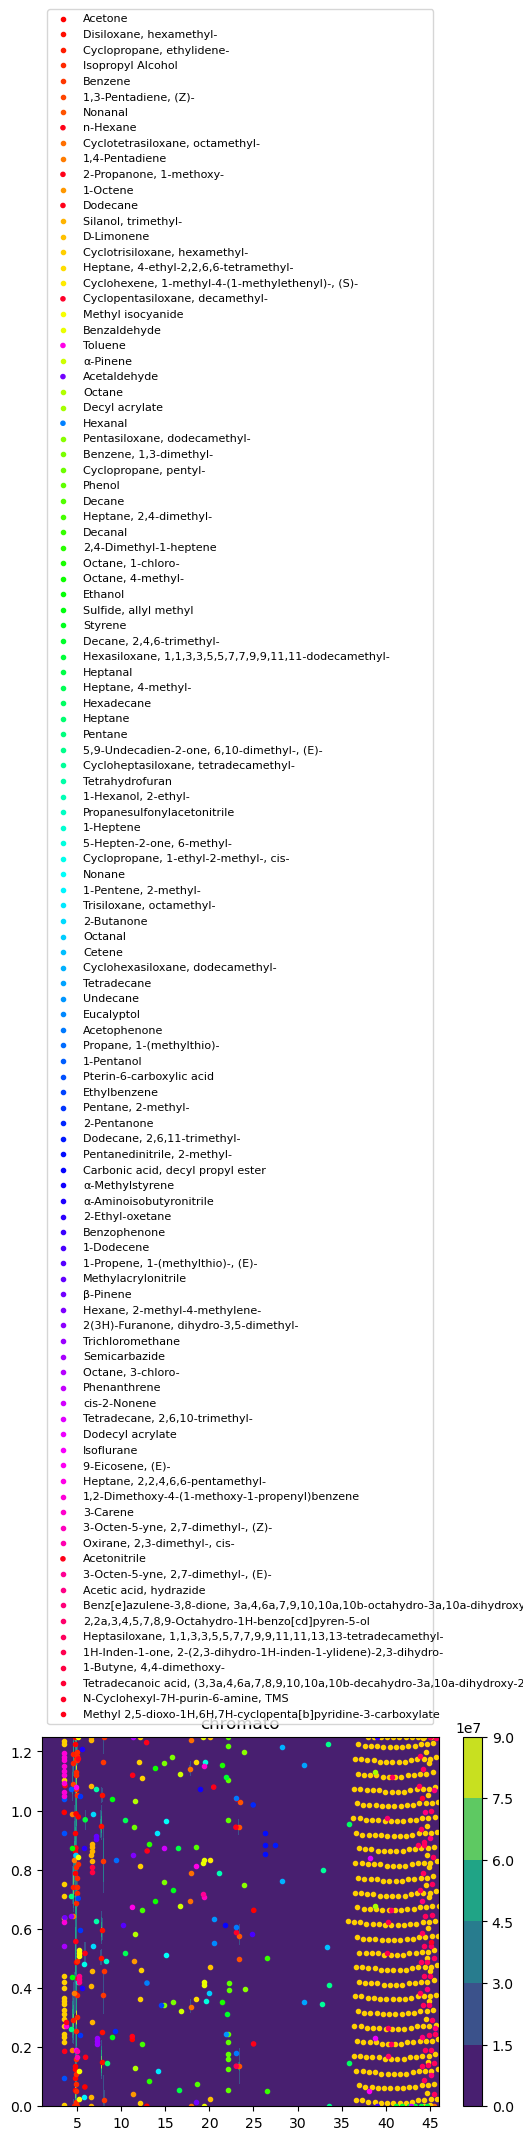

Acetone
Acetone
Acetone
Acetone
Acetone
Acetone
Acetone
Acetone
Acetone
Acetone
Acetone
Acetone
----
Disiloxane, hexamethyl-
Disiloxane, hexamethyl-
Disiloxane, hexamethyl-
Disiloxane, hexamethyl-
Disiloxane, hexamethyl-
Disiloxane, hexamethyl-
----
Cyclopropane, ethylidene-
Cyclopropane, ethylidene-
Cyclopropane, ethylidene-
Cyclopropane, ethylidene-
Cyclopropane, ethylidene-
----
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
Isopropyl Alcohol
----
Benzene
Benzene
Benzene
Benzene
Benzene
Benzene
----
1,3-Pentadiene, (Z)-
----
Nonanal
Nonanal
Nonanal
Nonanal
Nonanal
----
n-Hexane
n-Hexane
n-Hexane
n-Hexane


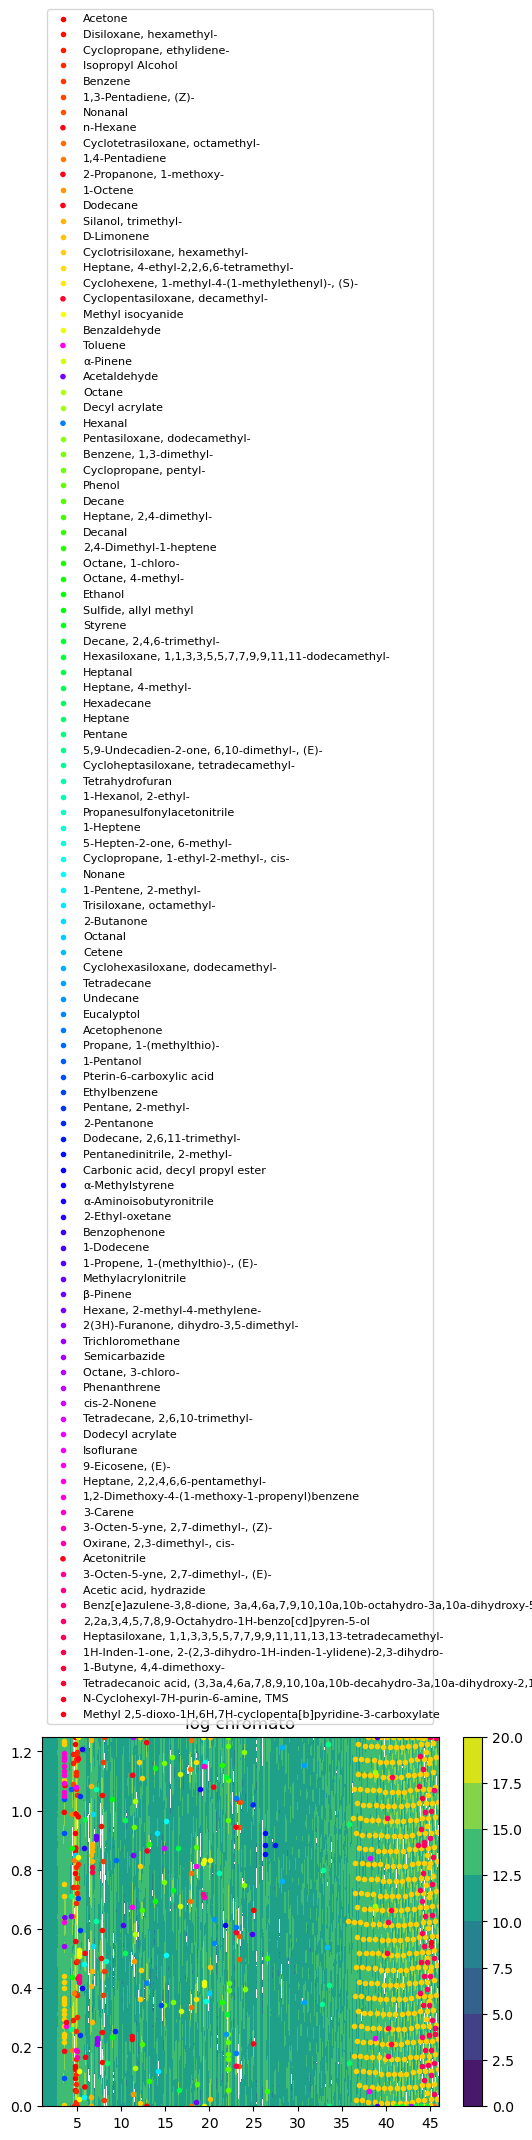

Acetone
----
Isopropyl Alcohol
Isopropyl Alcohol
----
2-Propanone, 1-methoxy-
----
Pentane, 2-methyl-
----
Isoflurane
----
Acetonitrile
----
['Acetone', 'Isopropyl Alcohol', '2-Propanone, 1-methoxy-', 'Pentane, 2-methyl-', 'Isoflurane', 'Acetonitrile']


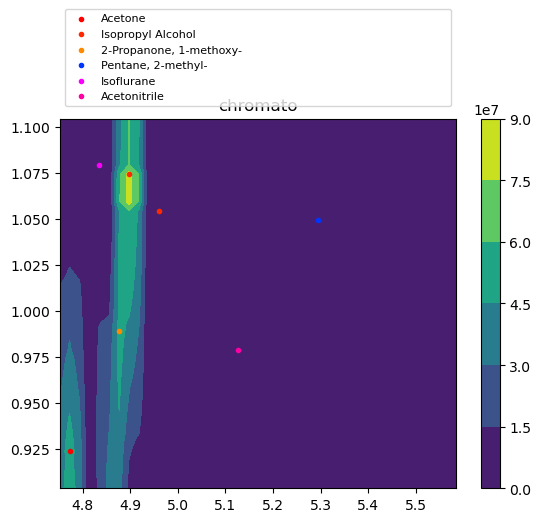

In [18]:
# plot peaks
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, points=coordinates_in_chromato, casnos_dict=casnos_dictall)
plot.visualizer((chromato, time_rn), title="log chromato", points=coordinates_in_chromato, casnos_dict=casnos_dictall)
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, casnos_dict=casnos_dictall, points=coordinates_in_chromato, center_pt=[200,200], center_pt_window_1=20, center_pt_window_2=20)

In [38]:
import importlib
importlib.reload(plot)

<module 'plot' from '/home/camille/Documents/code/agouet/Python-2DGC-Alignment/src/plot.py'>

Acetone
----
Isopropyl Alcohol
Isopropyl Alcohol
----
2-Propanone, 1-methoxy-
----
Pentane, 2-methyl-
----
Isoflurane
----
Acetonitrile
----
['Acetone', 'Isopropyl Alcohol', '2-Propanone, 1-methoxy-', 'Pentane, 2-methyl-', 'Isoflurane', 'Acetonitrile']


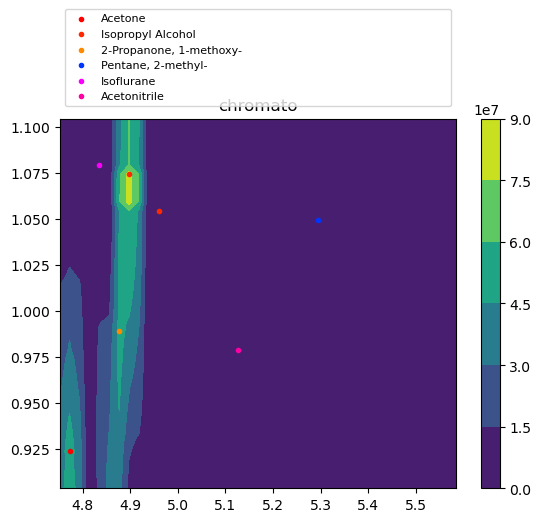

In [39]:
import importlib
importlib.reload(plot)
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, casnos_dict=casnos_dictall, points=coordinates_in_chromato, center_pt=[200,200], center_pt_window_1=20, center_pt_window_2=20)

Nonanal
Nonanal
----
D-Limonene
----
Cyclopentasiloxane, decamethyl-
----
Benzaldehyde
Benzaldehyde
----
Phenol
----
Nonane
----
Eucalyptol
----
1-Dodecene
----
['Nonanal', 'D-Limonene', 'Cyclopentasiloxane, decamethyl-', 'Benzaldehyde', 'Phenol', 'Nonane', 'Eucalyptol', '1-Dodecene']


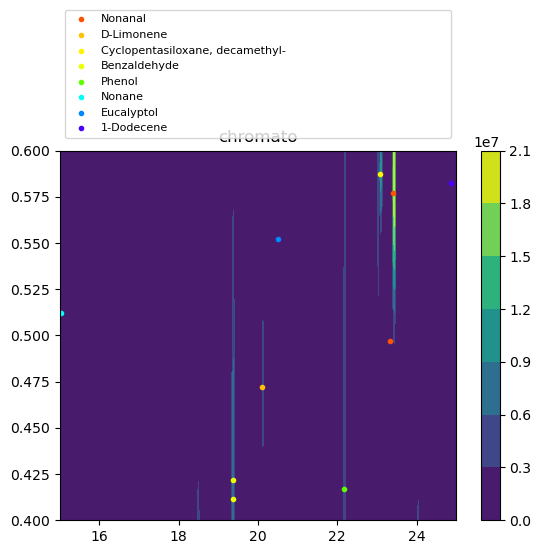

In [40]:
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, casnos_dict=casnos_dictall, points=coordinates_in_chromato, rt1 = 20, rt2 =0.5, rt1_window = 5, rt2_window = 0.1)